Bambang Abhinawa Pinakasakti

## **Import Libraries**

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pypalettes import load_cmap, get_hex

%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set_style('darkgrid')
cmap = load_cmap('cacnea').hex
palette = get_hex('cacnea')
palette_2_compare = get_hex('cacnea', keep_first_n=2)
palette_1 = get_hex('cacnea', keep_first_n=1)[0]

/home/abhinawap/miniconda3/envs/tf/lib/python3.12/site-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('cacnea').hex

  warnings.warn(warning_message, category=DeprecationWarning)
/home/abhinawap/miniconda3/envs/tf/lib/python3.12/site-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('cacnea').hex

  warnings.warn(warning_message, category=DeprecationWarning)
/home/abhinawap/miniconda3/envs/tf/lib/python3.12/site-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('cacnea').hex

  warnings.warn(warning_message, category=DeprecationWarning)


# **Bike Sharing**
This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
## **Overview**
### **Day table**
- `instant` - record index
- `dteday` - date
- `season` - seasons of the year (1: winter, 2:spring, 3:summer, 4:fall)
- `yr` - year (0: 2011, 1: 2012)
- `mnth` - month (1 to 12)
- `holiday` - day is holiday or not (0: not holiday, 1: holiday)
- `weekday` - day of the week
- `workingday` - if day is neither weekend nor holiday is 1, otherwise is 0
- `weathersit`:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain 
- `temp` - Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp` - Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum` - Normalized humidity. The values are divided to 100 (max)
- `windspeed` - Normalized wind speed. The values are divided to 67 (max)
- `casual` - count of casual users
- `registered` - count of registered users
- `cnt` - count of total rental bikes including both cacsual and registered

### **Hour table**
- `instant` - record index
- `dteday` - date
- `season` - seasons of the year (1: winter, 2:spring, 3:summer, 4:fall)
- `yr` - year (0: 2011, 1: 2012)
- `mnth` - month (1 to 12)
- `hr` - hour (0 to 23)
- `holiday` - day is holiday or not (0: not holiday, 1: holiday)
- `weekday` - day of the week
- `workingday` - if day is neither weekend nor holiday is 1, otherwise is 0
- `weathersit`:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` - Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp` - Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum` - Normalized humidity. The values are divided to 100 (max)
- `windspeed` - Normalized wind speed. The values are divided to 67 (max)
- `casual` - count of casual users
- `registered` - count of registered users
- `cnt` - count of total rental bikes including both cacsual and registered

## **Business Questions**
- What are the main factors that influence the total count of rentals (`cnt`)?
- How do casual and  registered users differ in their rental patterns?


## **Data Wrangling**
### **Gathering Data**

In [162]:
df_day = pd.read_csv('/home/abhinawap/StudySes/Dicoding/Analyst_project/Bike-sharing-dataset/day.csv', index_col='instant')
df_hour = pd.read_csv('/home/abhinawap/StudySes/Dicoding/Analyst_project/Bike-sharing-dataset/hour.csv', index_col='instant')

In [163]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [164]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [165]:
# Select the columns to merge from the day table
day_columns_to_merge = ['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Merge the selected columns from day_df into hour_df on the 'dteday' column
merged_df = df_hour.merge(df_day[day_columns_to_merge], on='dteday', suffixes=('', '_day'))

# Display the first few rows of the merged DataFrame to verify
merged_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,13,16,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,32,40,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,27,32,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,10,13,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,1,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### **Assesing Data**

In [166]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [167]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [168]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dteday          17379 non-null  object 
 1   season          17379 non-null  int64  
 2   yr              17379 non-null  int64  
 3   mnth            17379 non-null  int64  
 4   hr              17379 non-null  int64  
 5   holiday         17379 non-null  int64  
 6   weekday         17379 non-null  int64  
 7   workingday      17379 non-null  int64  
 8   weathersit      17379 non-null  int64  
 9   temp            17379 non-null  float64
 10  atemp           17379 non-null  float64
 11  hum             17379 non-null  float64
 12  windspeed       17379 non-null  float64
 13  casual          17379 non-null  int64  
 14  registered      17379 non-null  int64  
 15  cnt             17379 non-null  int64  
 16  weathersit_day  17379 non-null  int64  
 17  temp_day        17379 non-null 

In [169]:
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [170]:
df_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [171]:
merged_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,registered,cnt,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,...,153.786869,189.463088,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,...,151.357286,181.387599,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,...,0.000000,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,...,34.000000,40.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,...,115.000000,142.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,...,220.000000,281.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,...,886.000000,977.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [172]:
df_day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [173]:
df_hour.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [174]:
merged_df.isnull().sum()

dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
weathersit_day    0
temp_day          0
atemp_day         0
hum_day           0
windspeed_day     0
casual_day        0
registered_day    0
cnt_day           0
dtype: int64

In [175]:
df_day.duplicated().sum()

0

In [176]:
df_hour.duplicated().sum()

0

In [177]:
merged_df.duplicated().sum()

0

In [178]:
df_day.shape

(731, 15)

In [179]:
df_hour.shape

(17379, 16)

In [180]:
merged_df.shape

(17379, 24)

### **Cleaning Data**
No need for cleaning data as there are no missing values in both of the dataset.

## **EDA**
- What are the main factors that influence the total count of rentals (`cnt`)?
- How do casual and  registered users differ in their rental patterns?


### **Addressing Business Question #1**
- What are the main factors that influence the total count of rentals (`cnt`)?

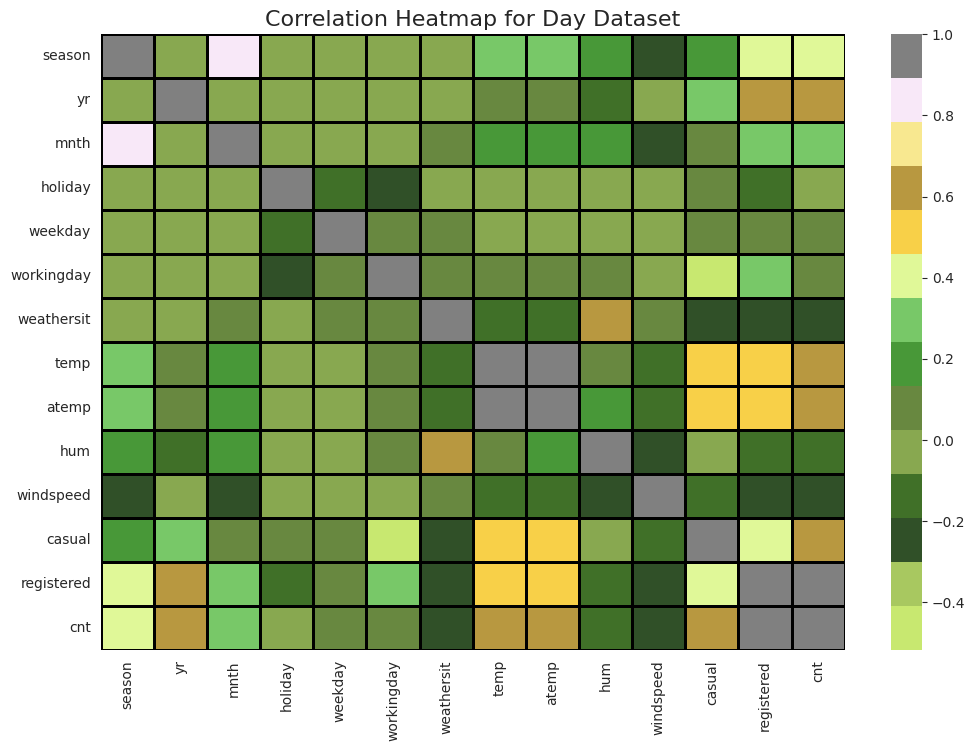

In [181]:
num_cols_day = df_day.select_dtypes(include=np.number).columns
num_cols_hour = df_hour.select_dtypes(include=np.number).columns
num_cols_merged = merged_df.select_dtypes(include=np.number).columns

# Plot heatmap for day dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_day[num_cols_day].corr(), annot=False, fmt='.2f', linecolor='black', linewidths=2, cmap=cmap)
plt.title('Correlation Heatmap for Day Dataset')
plt.show()

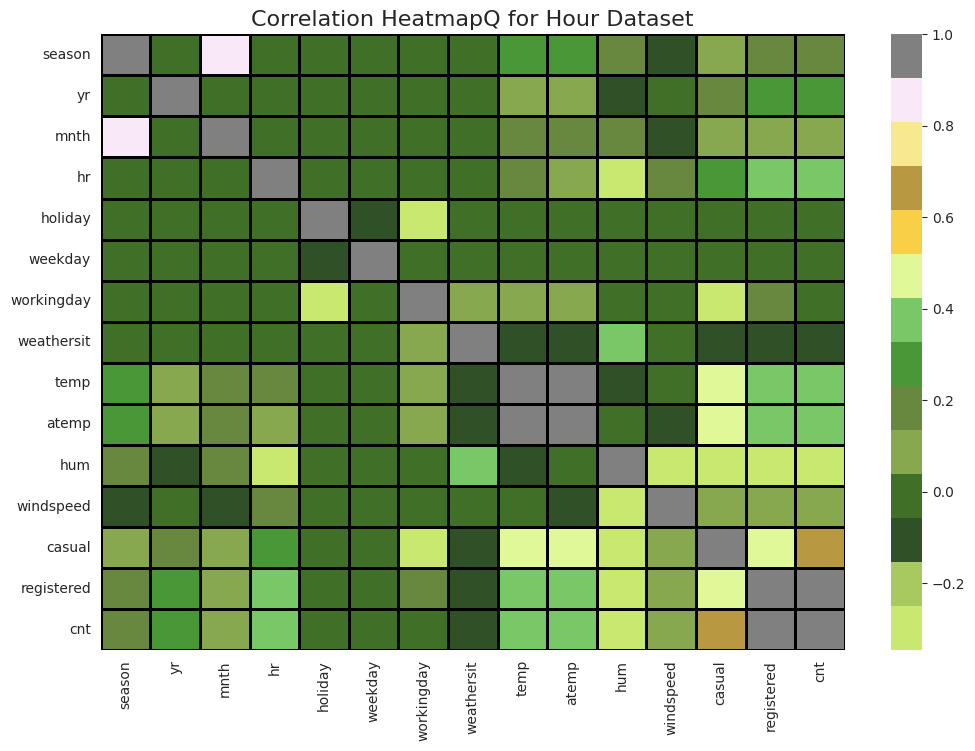

In [182]:
# Plot heatmap for hour dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_hour[num_cols_hour].corr(), annot=False, fmt='.2f', linecolor='black', linewidths=2, cmap=cmap)
plt.title('Correlation HeatmapQ for Hour Dataset')
plt.show()

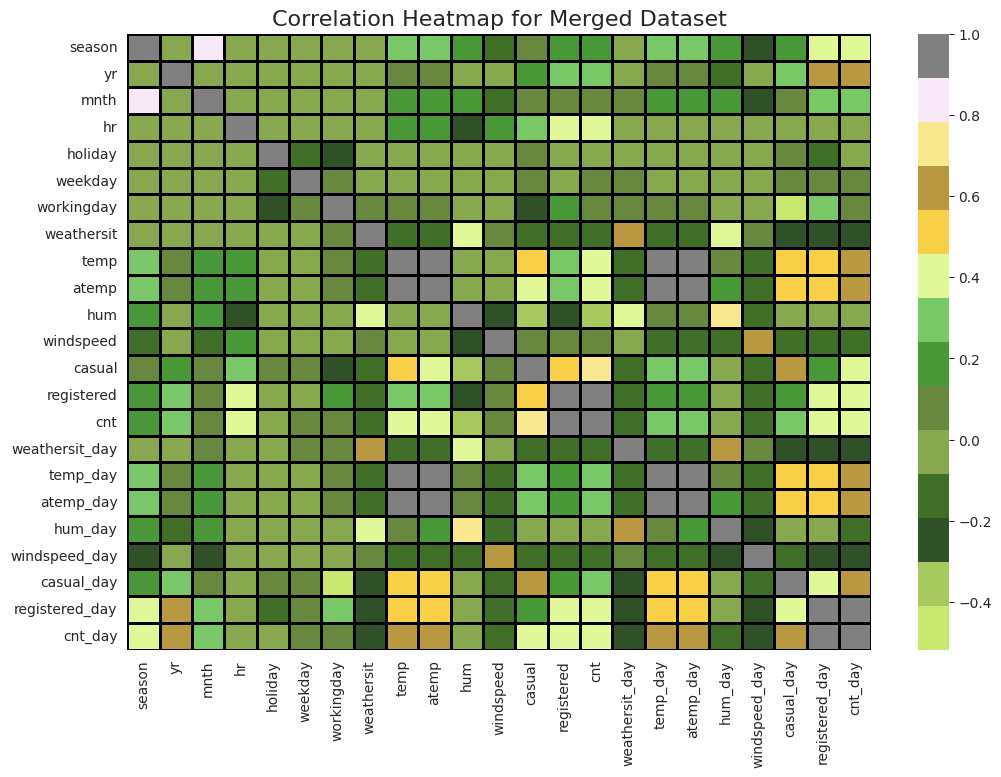

In [183]:
# Plot heatmap for hour dataset
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df[num_cols_merged].corr(), annot=False, fmt='.2f', linecolor='black', linewidths=2, cmap=cmap)
plt.title('Correlation Heatmap for Merged Dataset')
plt.show()

From these three heatmaps, it seems like the correlation to the column `cnt` is bias towards `registered` and `casual`. This makes sense because `cnt` is the sum of `registered` and `casual`. Let's drop `registered` and `casual` in day and hour table while for the merged table drop `registered`, `casual`, `registered_day`, and `casual_day`.

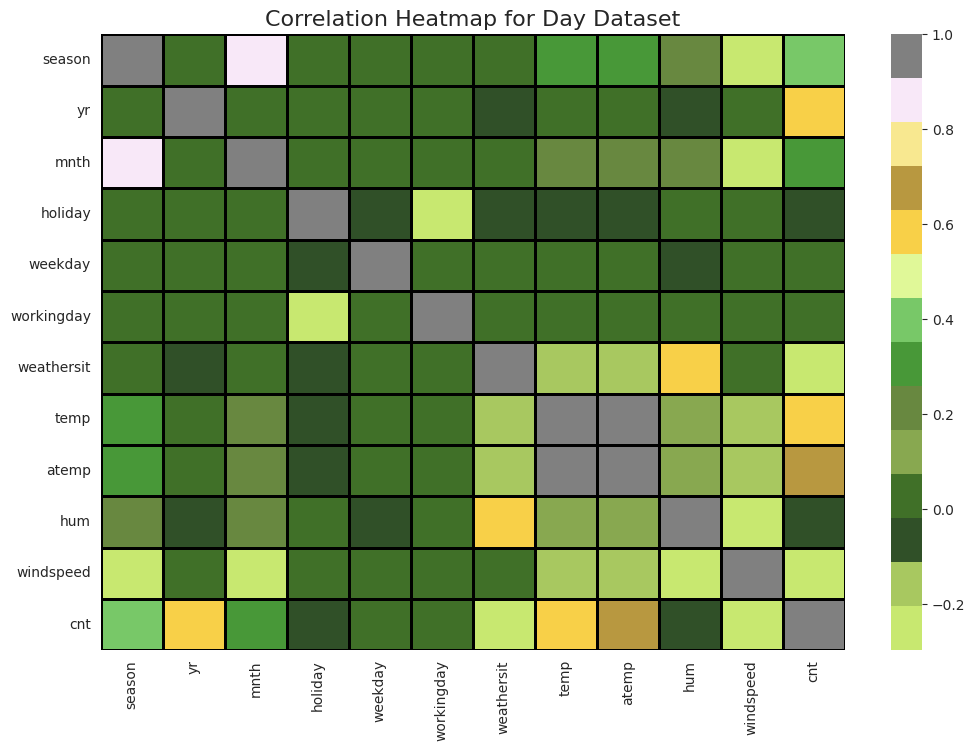

In [184]:
df_day_no_casual_registered = df_day.drop(['casual', 'registered'], axis=1)
df_hour_no_casual_registered = df_hour.drop(['casual', 'registered'], axis=1)
merged_df_no_casual_registered = merged_df.drop(['casual', 'registered', 'casual_day', 'registered_day'], axis=1)

num_cols_day_no_casual_registered = df_day_no_casual_registered.select_dtypes(include=np.number).columns
num_cols_hour_no_casual_registered = df_hour_no_casual_registered.select_dtypes(include=np.number).columns
num_cols_merged_no_casual_registered = merged_df_no_casual_registered.select_dtypes(include=np.number).columns

# Heatmap for day dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_day_no_casual_registered[num_cols_day_no_casual_registered].corr(), annot=False, fmt='.2f', linecolor='black', linewidths=2, cmap=cmap)
plt.title('Correlation Heatmap for Day Dataset')
plt.show()

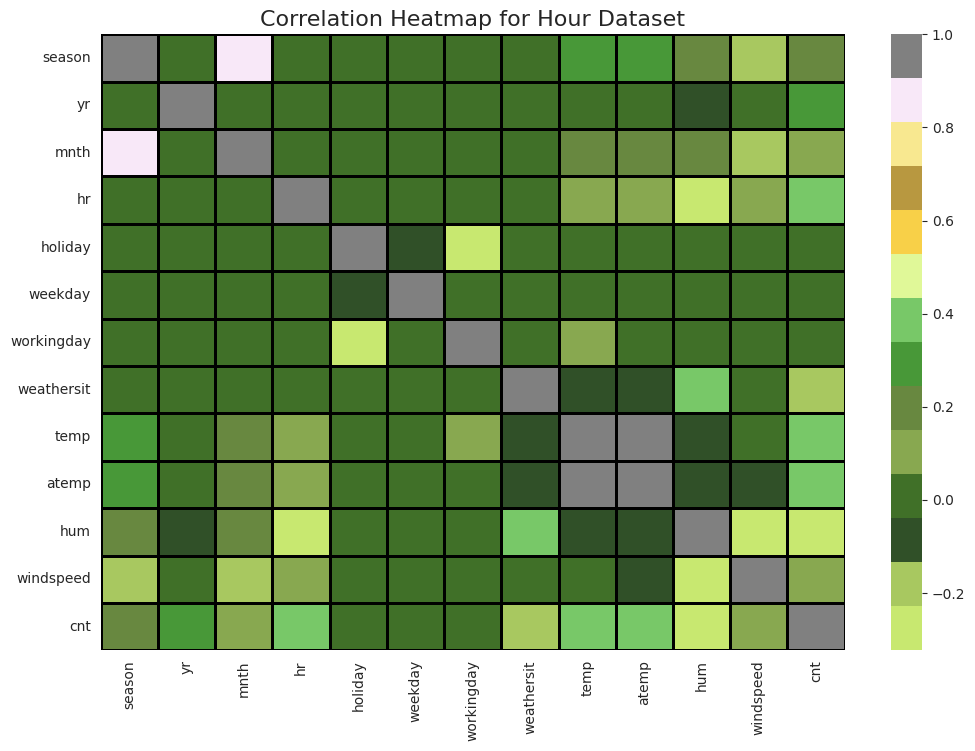

In [185]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_hour_no_casual_registered[num_cols_hour_no_casual_registered].corr(), annot=False, fmt='.2f', linewidths=2, linecolor='black', cmap=cmap)
plt.title('Correlation Heatmap for Hour Dataset')
plt.show()

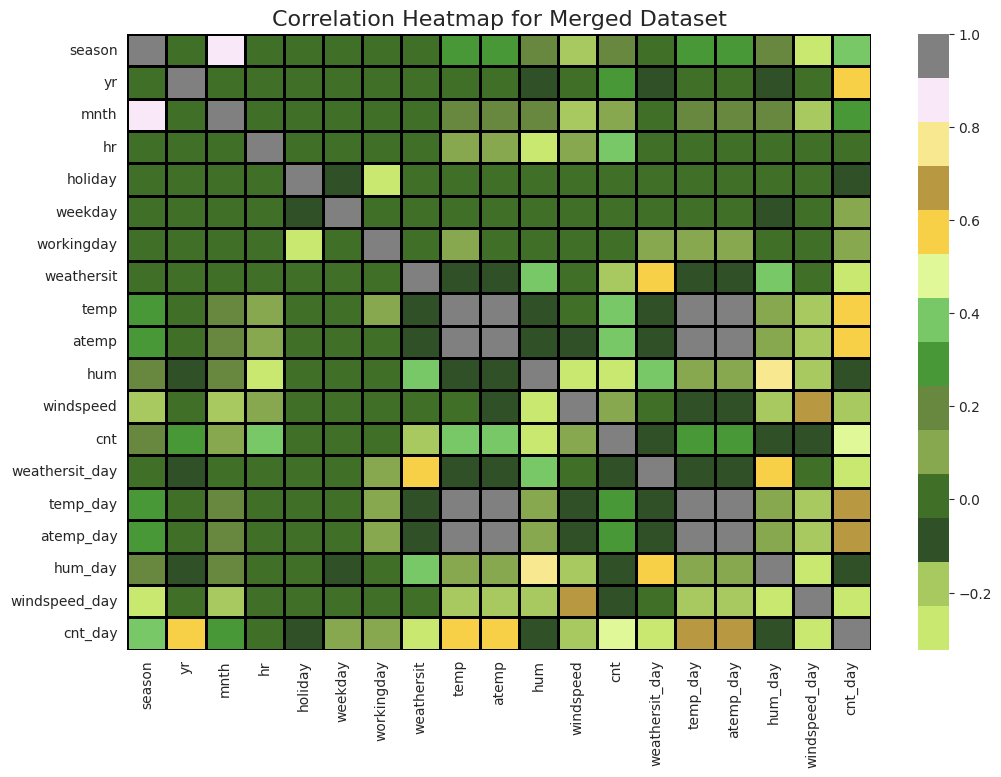

In [186]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df_no_casual_registered[num_cols_merged_no_casual_registered].corr(), annot=False, fmt='.2f', linecolor='black', linewidths=2, cmap=cmap)
plt.title('Correlation Heatmap for Merged Dataset')
plt.show()

From these three heatmaps, some columns i.e. `yr`, `temp`, and `atemp` have significant correlation with `cnt`. Let's check the distribution of numeric categorical columns vs `cnt` to see if there are any other columns that can be a factor of the total rentals.

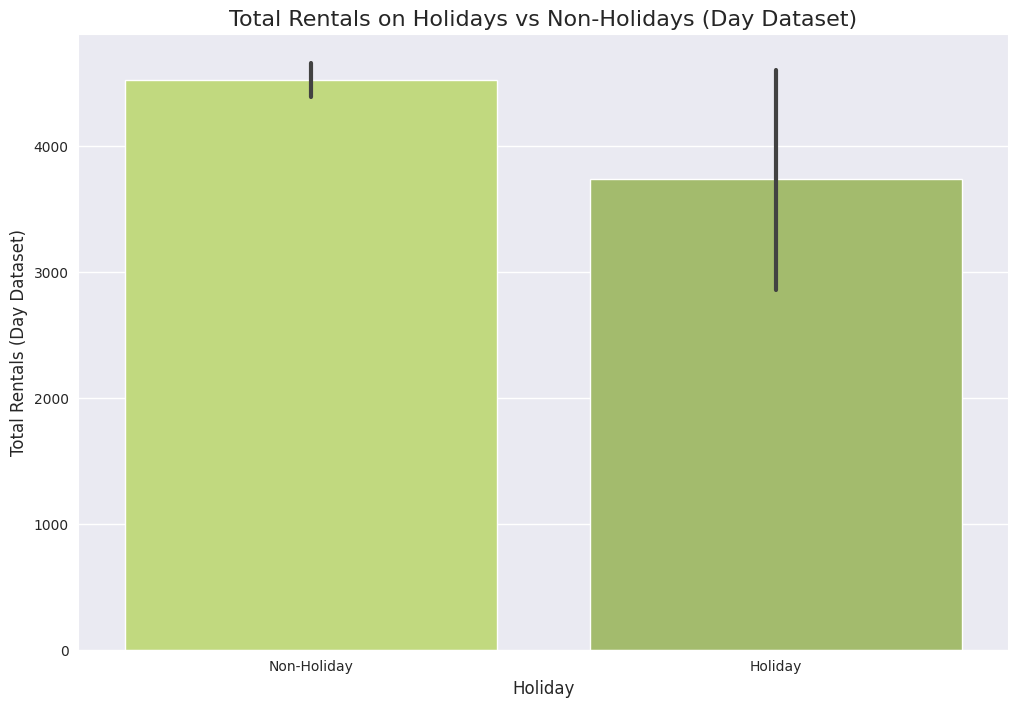

In [187]:
holiday_map = {0: 'Non-Holiday', 1: 'Holiday'}
holiday_day = df_day['holiday'].map(holiday_map)
holiday_hour = df_hour['holiday'].map(holiday_map)

plt.figure(figsize=(12, 8))
sns.barplot(x=holiday_day, y='cnt', data=df_day, palette=palette_2_compare, hue=holiday_day, legend=False)
plt.title('Total Rentals on Holidays vs Non-Holidays (Day Dataset)')
plt.xlabel('Holiday')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

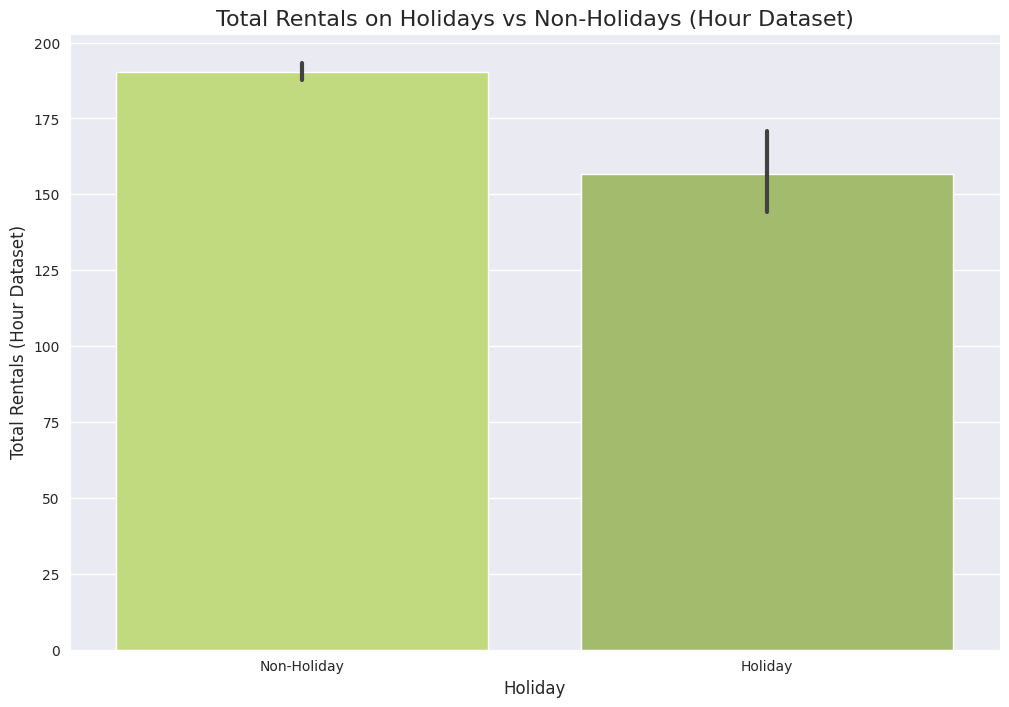

In [188]:
plt.figure(figsize=(12, 8))
sns.barplot(x=holiday_hour, y='cnt', data=df_hour, palette=palette_2_compare, hue=holiday_hour, legend=False)
plt.title('Total Rentals on Holidays vs Non-Holidays (Hour Dataset)')
plt.xlabel('Holiday')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

/tmp/ipykernel_1081/567560625.py:8: UserWarning: The palette list has more values (14) than needed (4), which may not be intended.
  sns.barplot(x=season_day, y='cnt', data=df_day, palette=palette, hue=season_day, legend=False)


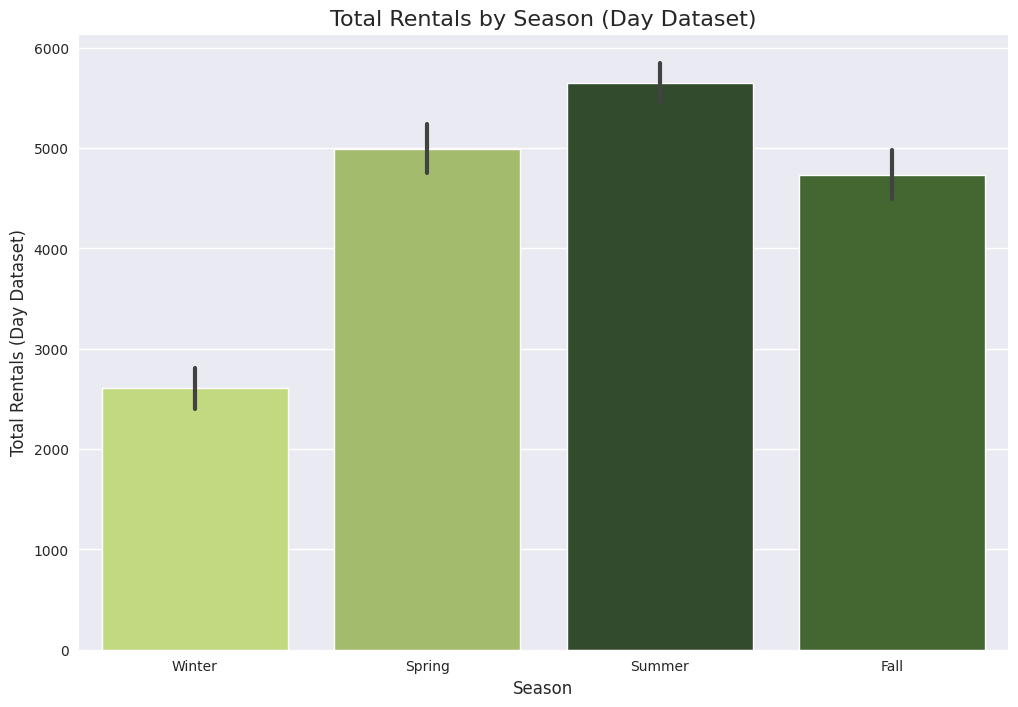

In [189]:
# Mapping the season column
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
season_day = df_day['season'].map(season_map)
season_hour = df_hour['season'].map(season_map)

# Plot bar plot for season column
plt.figure(figsize=(12, 8))
sns.barplot(x=season_day, y='cnt', data=df_day, palette=palette, hue=season_day, legend=False)
plt.title('Total Rentals by Season (Day Dataset)')
plt.xlabel('Season')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

/tmp/ipykernel_1081/934211809.py:2: UserWarning: The palette list has more values (14) than needed (4), which may not be intended.
  sns.barplot(x=season_hour, y='cnt', data=df_hour, palette=palette, hue=season_hour, legend=False)


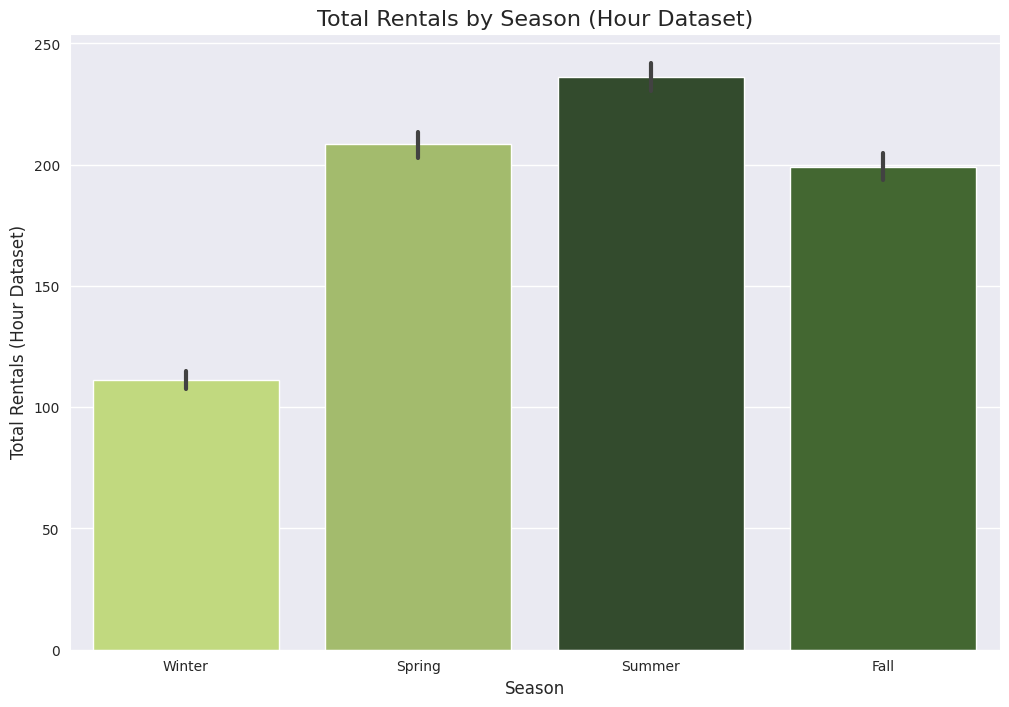

In [190]:
plt.figure(figsize=(12, 8))
sns.barplot(x=season_hour, y='cnt', data=df_hour, palette=palette, hue=season_hour, legend=False)
plt.title('Total Rentals by Season (Hour Dataset)')
plt.xlabel('Season')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

/tmp/ipykernel_1081/979068593.py:6: UserWarning: The palette list has more values (14) than needed (3), which may not be intended.
  sns.barplot(x=weather_day, y='cnt', data=df_day, palette=palette, hue=weather_day, legend=False)


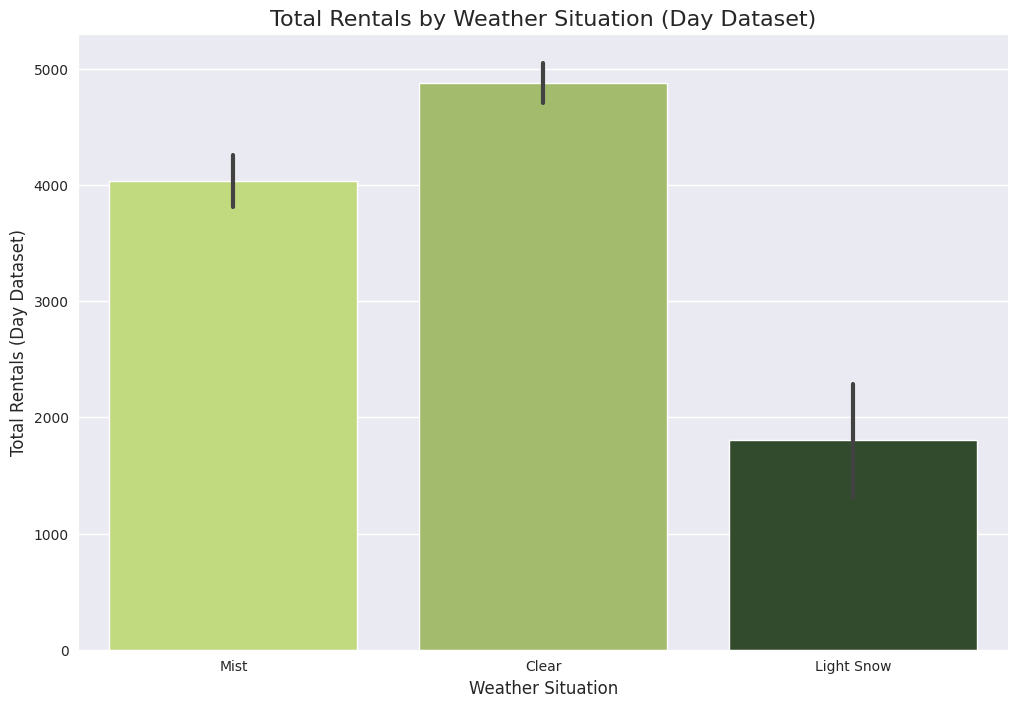

In [191]:
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
weather_day = df_day['weathersit'].map(weather_map)
weather_hour = df_hour['weathersit'].map(weather_map)

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_day, y='cnt', data=df_day, palette=palette, hue=weather_day, legend=False)
plt.title('Total Rentals by Weather Situation (Day Dataset)')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

/tmp/ipykernel_1081/3337196189.py:2: UserWarning: The palette list has more values (14) than needed (4), which may not be intended.
  sns.barplot(x=weather_hour, y='cnt', data=df_hour, palette=palette, hue=weather_hour, legend=False)


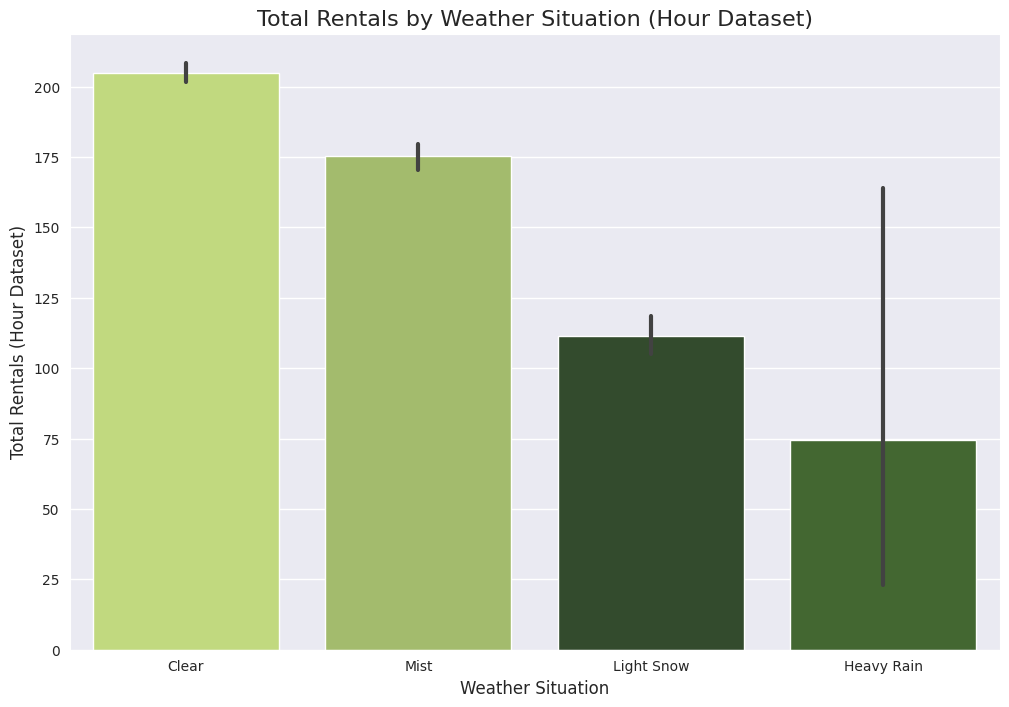

In [192]:
plt.figure(figsize=(12, 8))
sns.barplot(x=weather_hour, y='cnt', data=df_hour, palette=palette, hue=weather_hour, legend=False)
plt.title('Total Rentals by Weather Situation (Hour Dataset)')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

/tmp/ipykernel_1081/1092641227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df_day, palette=palette_2_compare)


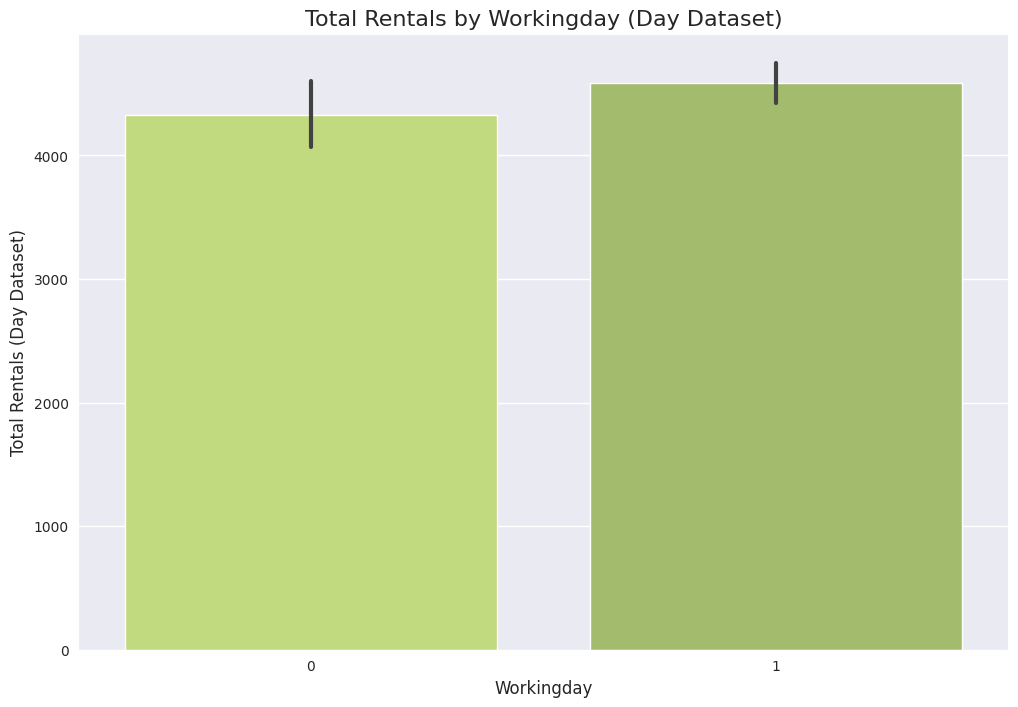

In [193]:
workday_map = {0: 'Non-Workingday', 1: 'Workingday'}
workday_day = df_day['workingday'].map(workday_map)
workday_hour = df_hour['workingday'].map(workday_map)

plt.figure(figsize=(12, 8))
sns.barplot(x='workingday', y='cnt', data=df_day, palette=palette_2_compare)
plt.title('Total Rentals by Workingday (Day Dataset)')
plt.xlabel('Workingday')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

/tmp/ipykernel_1081/680263746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df_hour, palette=palette_2_compare)


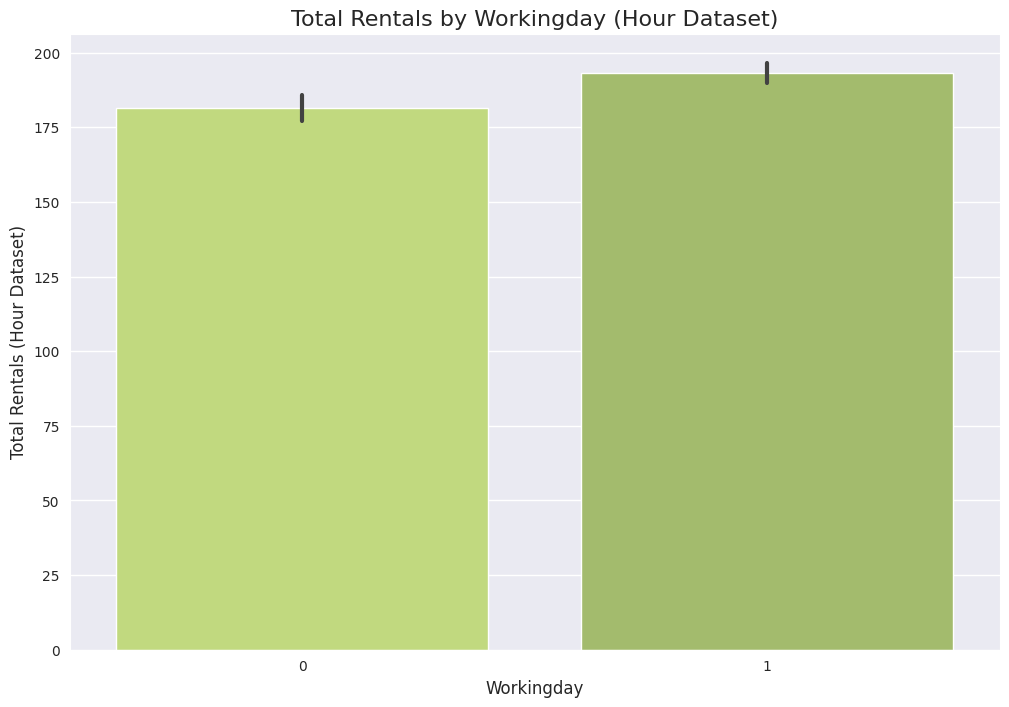

In [194]:
plt.figure(figsize=(12, 8))
sns.barplot(x='workingday', y='cnt', data=df_hour, palette=palette_2_compare)
plt.title('Total Rentals by Workingday (Hour Dataset)')
plt.xlabel('Workingday')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

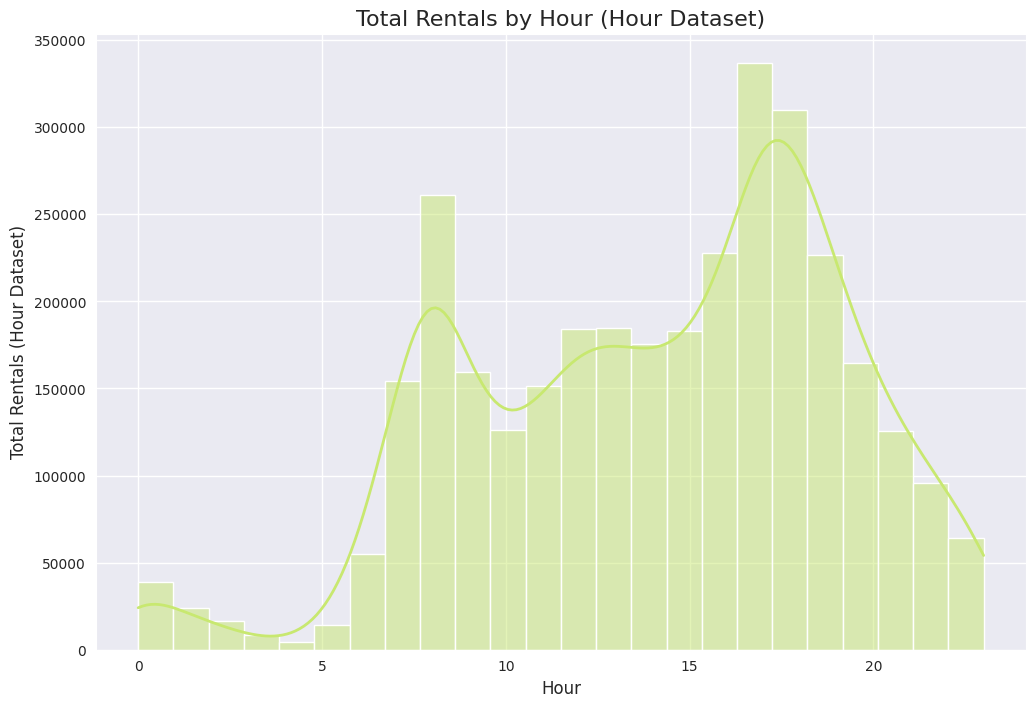

In [195]:
plt.figure(figsize=(12, 8))
sns.histplot(x='hr', weights='cnt', data=df_hour, color=palette_1, bins=24, kde=True)
plt.title('Total Rentals by Hour (Hour Dataset)')
plt.xlabel('Hour')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

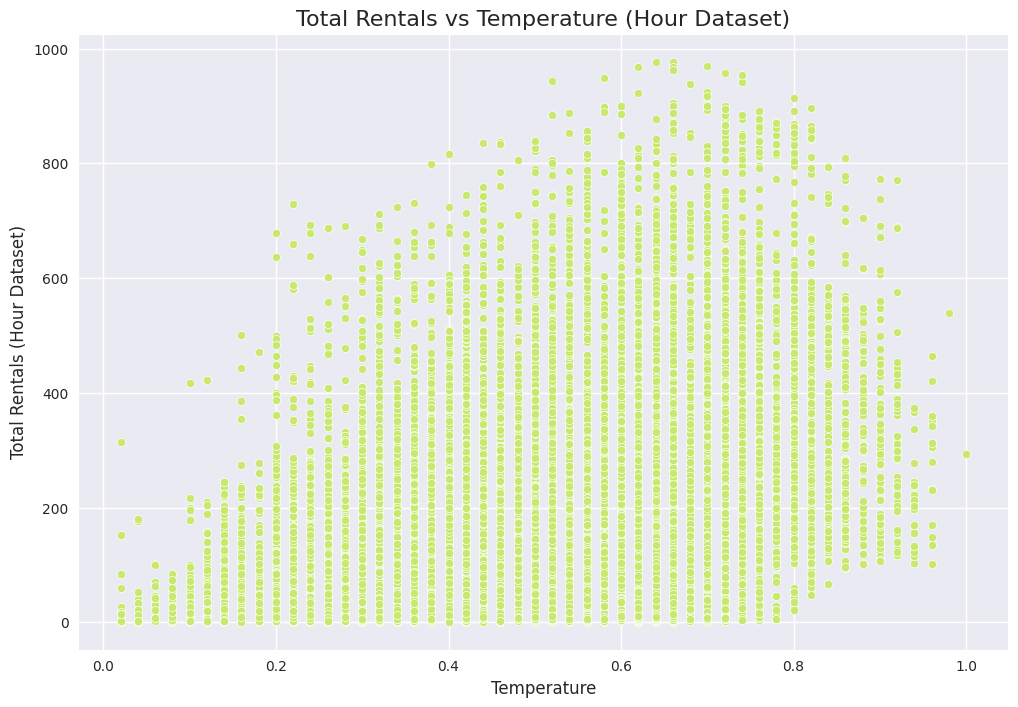

In [196]:
# Temp vs cnt
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='cnt', data=df_hour, color=palette_1)
plt.title('Total Rentals vs Temperature (Hour Dataset)')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

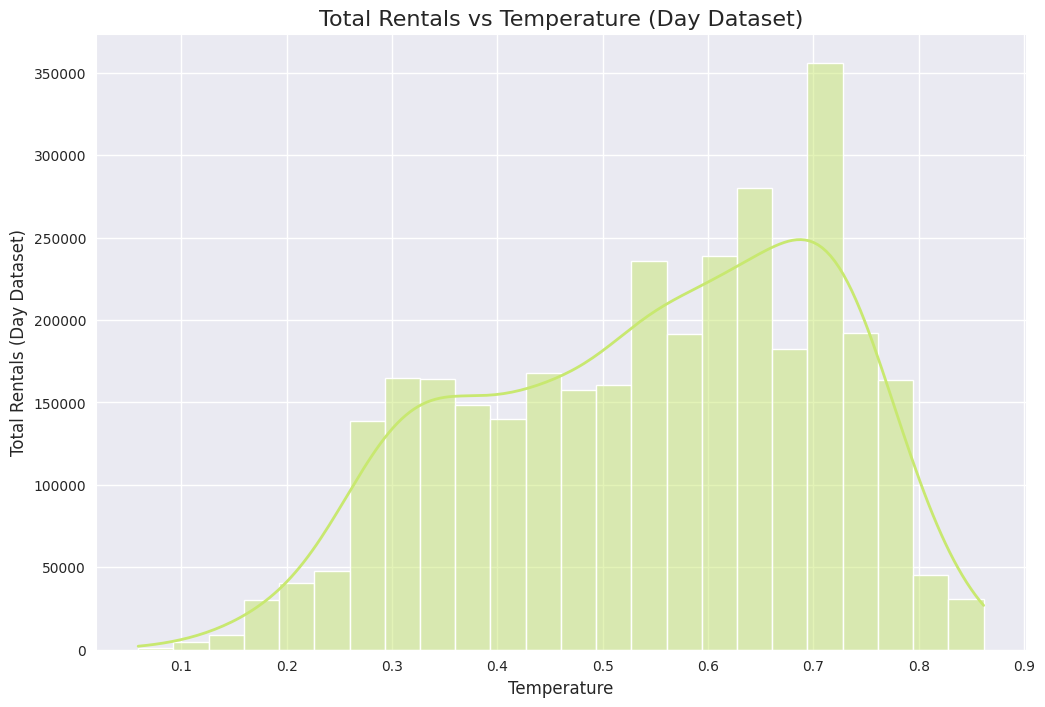

In [197]:
# Temp vs cnt
plt.figure(figsize=(12, 8))
sns.histplot(x='temp', weights='cnt', data=df_day, color=palette_1, bins=24, kde=True)
plt.title('Total Rentals vs Temperature (Day Dataset)')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

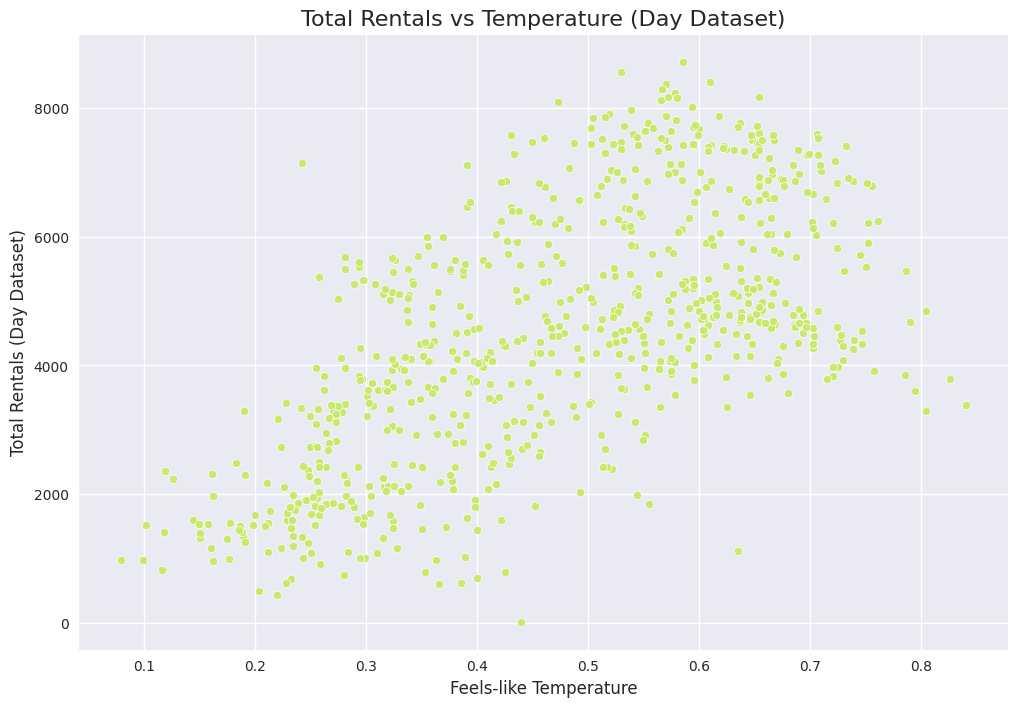

In [198]:
# Temp vs cnt
plt.figure(figsize=(12, 8))
sns.scatterplot(x='atemp', y='cnt', data=df_day, color=palette_1)
plt.title('Total Rentals vs Temperature (Day Dataset)')
plt.xlabel('Feels-like Temperature')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

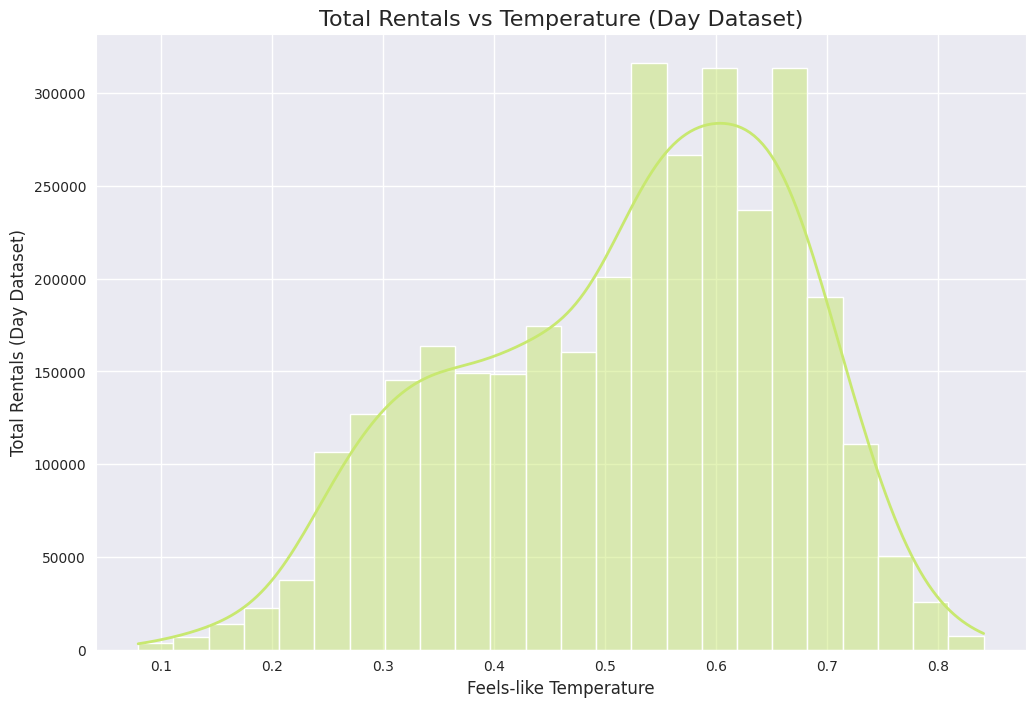

In [199]:
# Temp vs cnt
plt.figure(figsize=(12, 8))
sns.histplot(x='atemp', weights='cnt', data=df_day, color=palette_1, bins=24, kde=True)
plt.title('Total Rentals vs Temperature (Day Dataset)')
plt.xlabel('Feels-like Temperature')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()

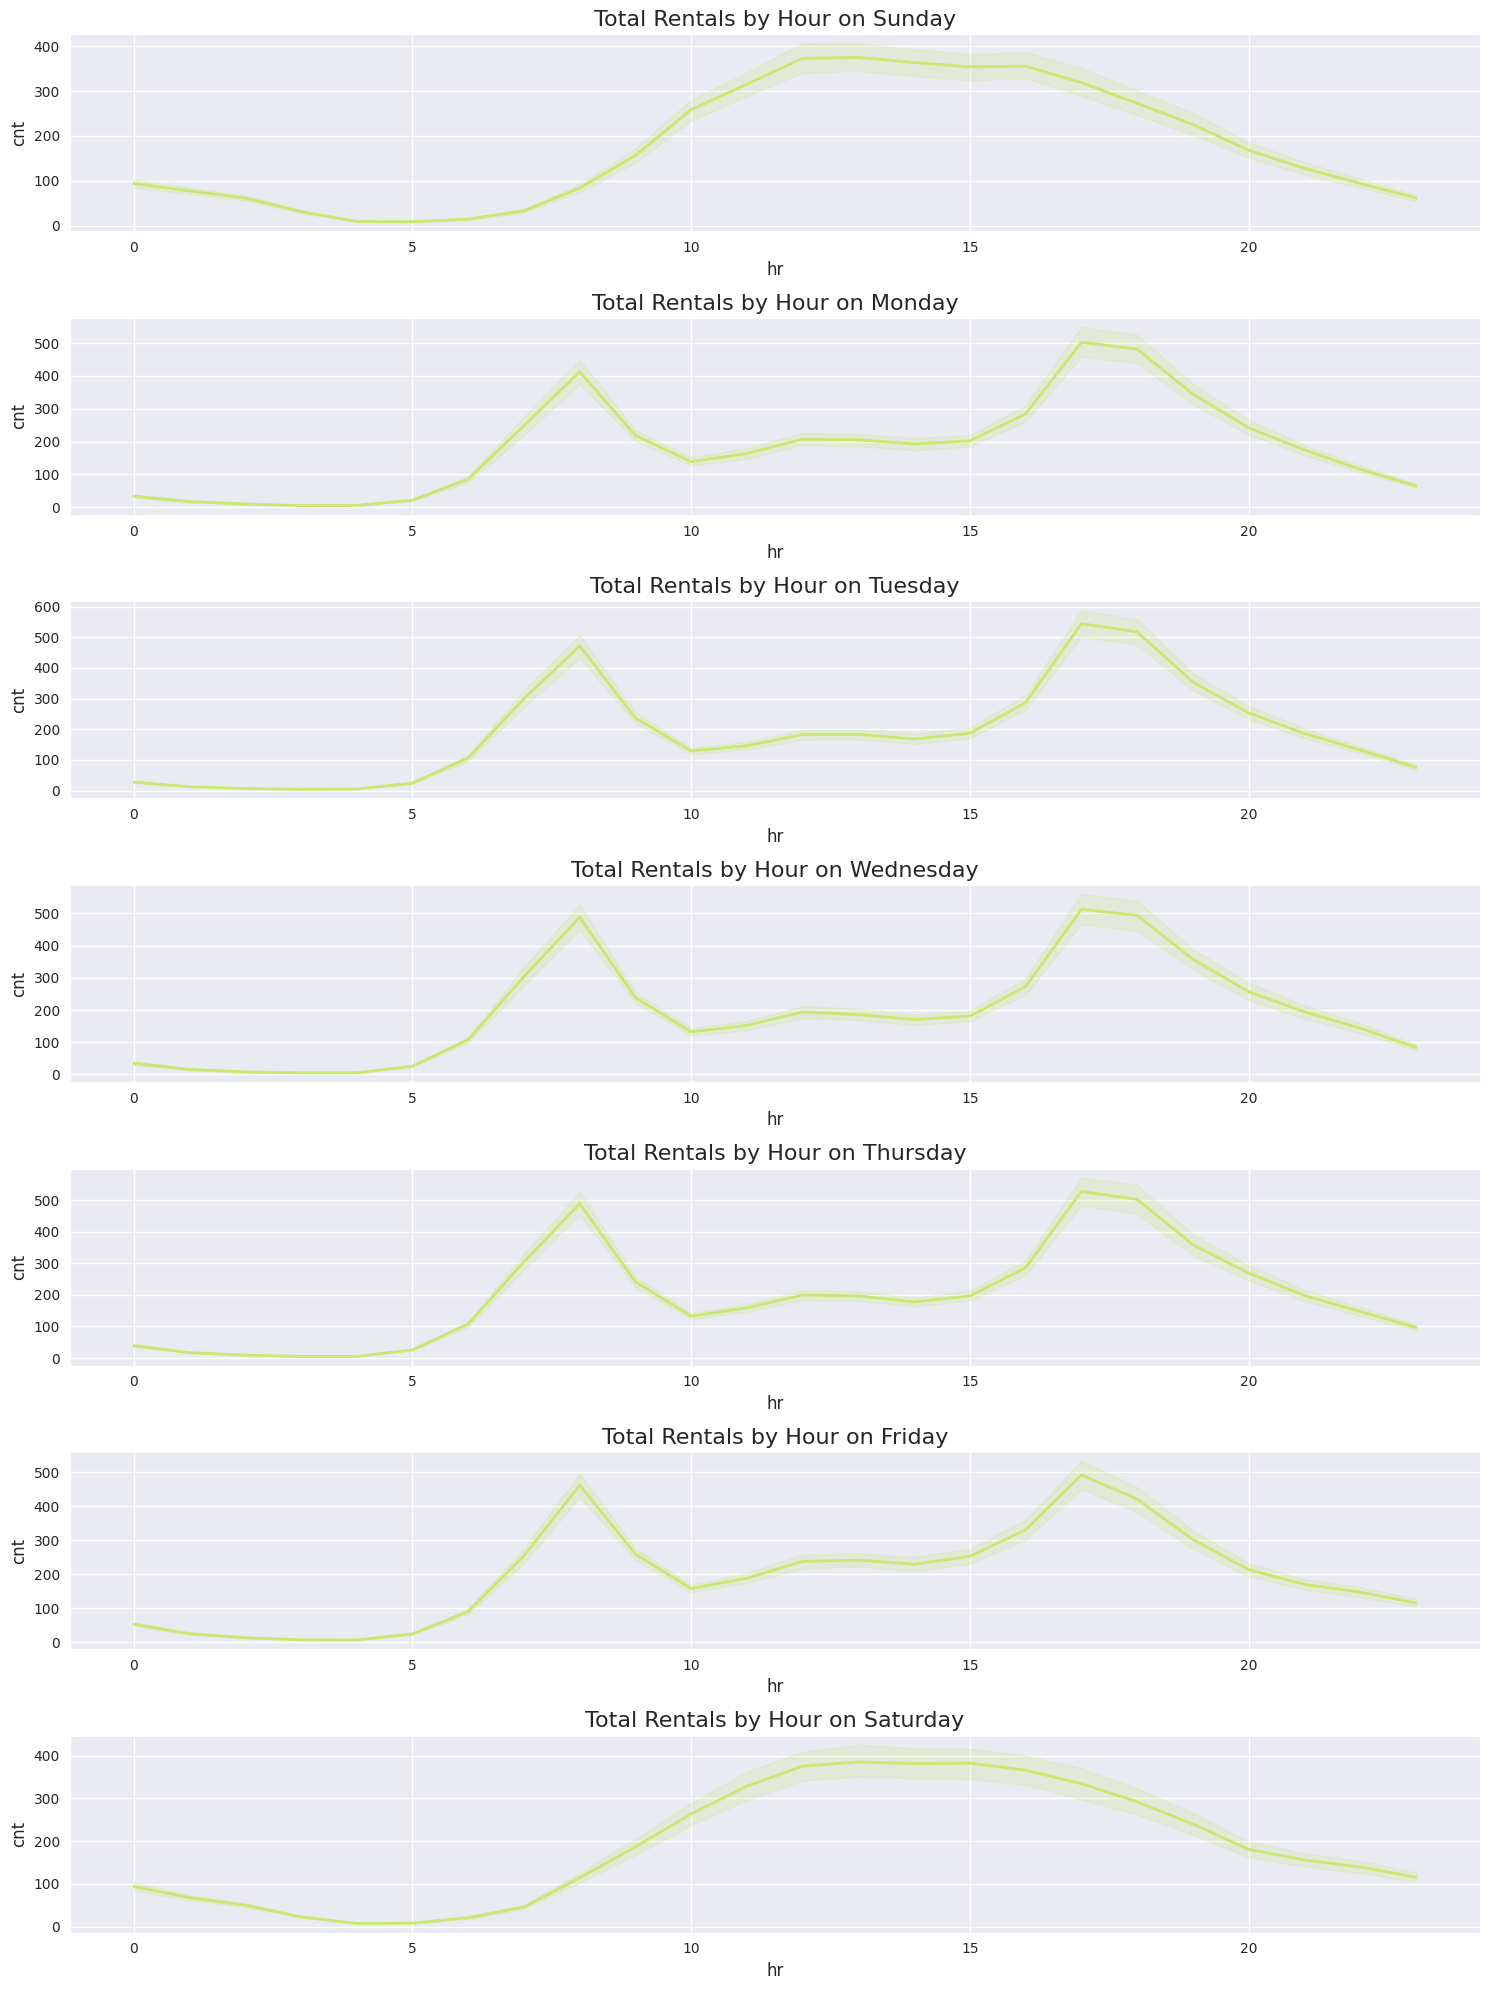

In [ ]:
# Plotting the distribution of the count of bikes rented per hour for each day of the week
fig, ax = plt.subplots(7, 1, figsize=(15, 20))

# Define the weekday mapping outside the loop
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

for i in range(7):
    df_weekday = df_hour[df_hour['weekday'] == i].copy()
    df_weekday['weekday'] = df_weekday['weekday'].map(weekday_map)

    # Plot each day’s data on a separate subplot
    sns.lineplot(x='hr', y='cnt', data=df_weekday, ax=ax[i], color=palette_1)
    ax[i].set_title(f'Total Rentals by Hour on {weekday_map[i]}')

plt.tight_layout()
plt.show()


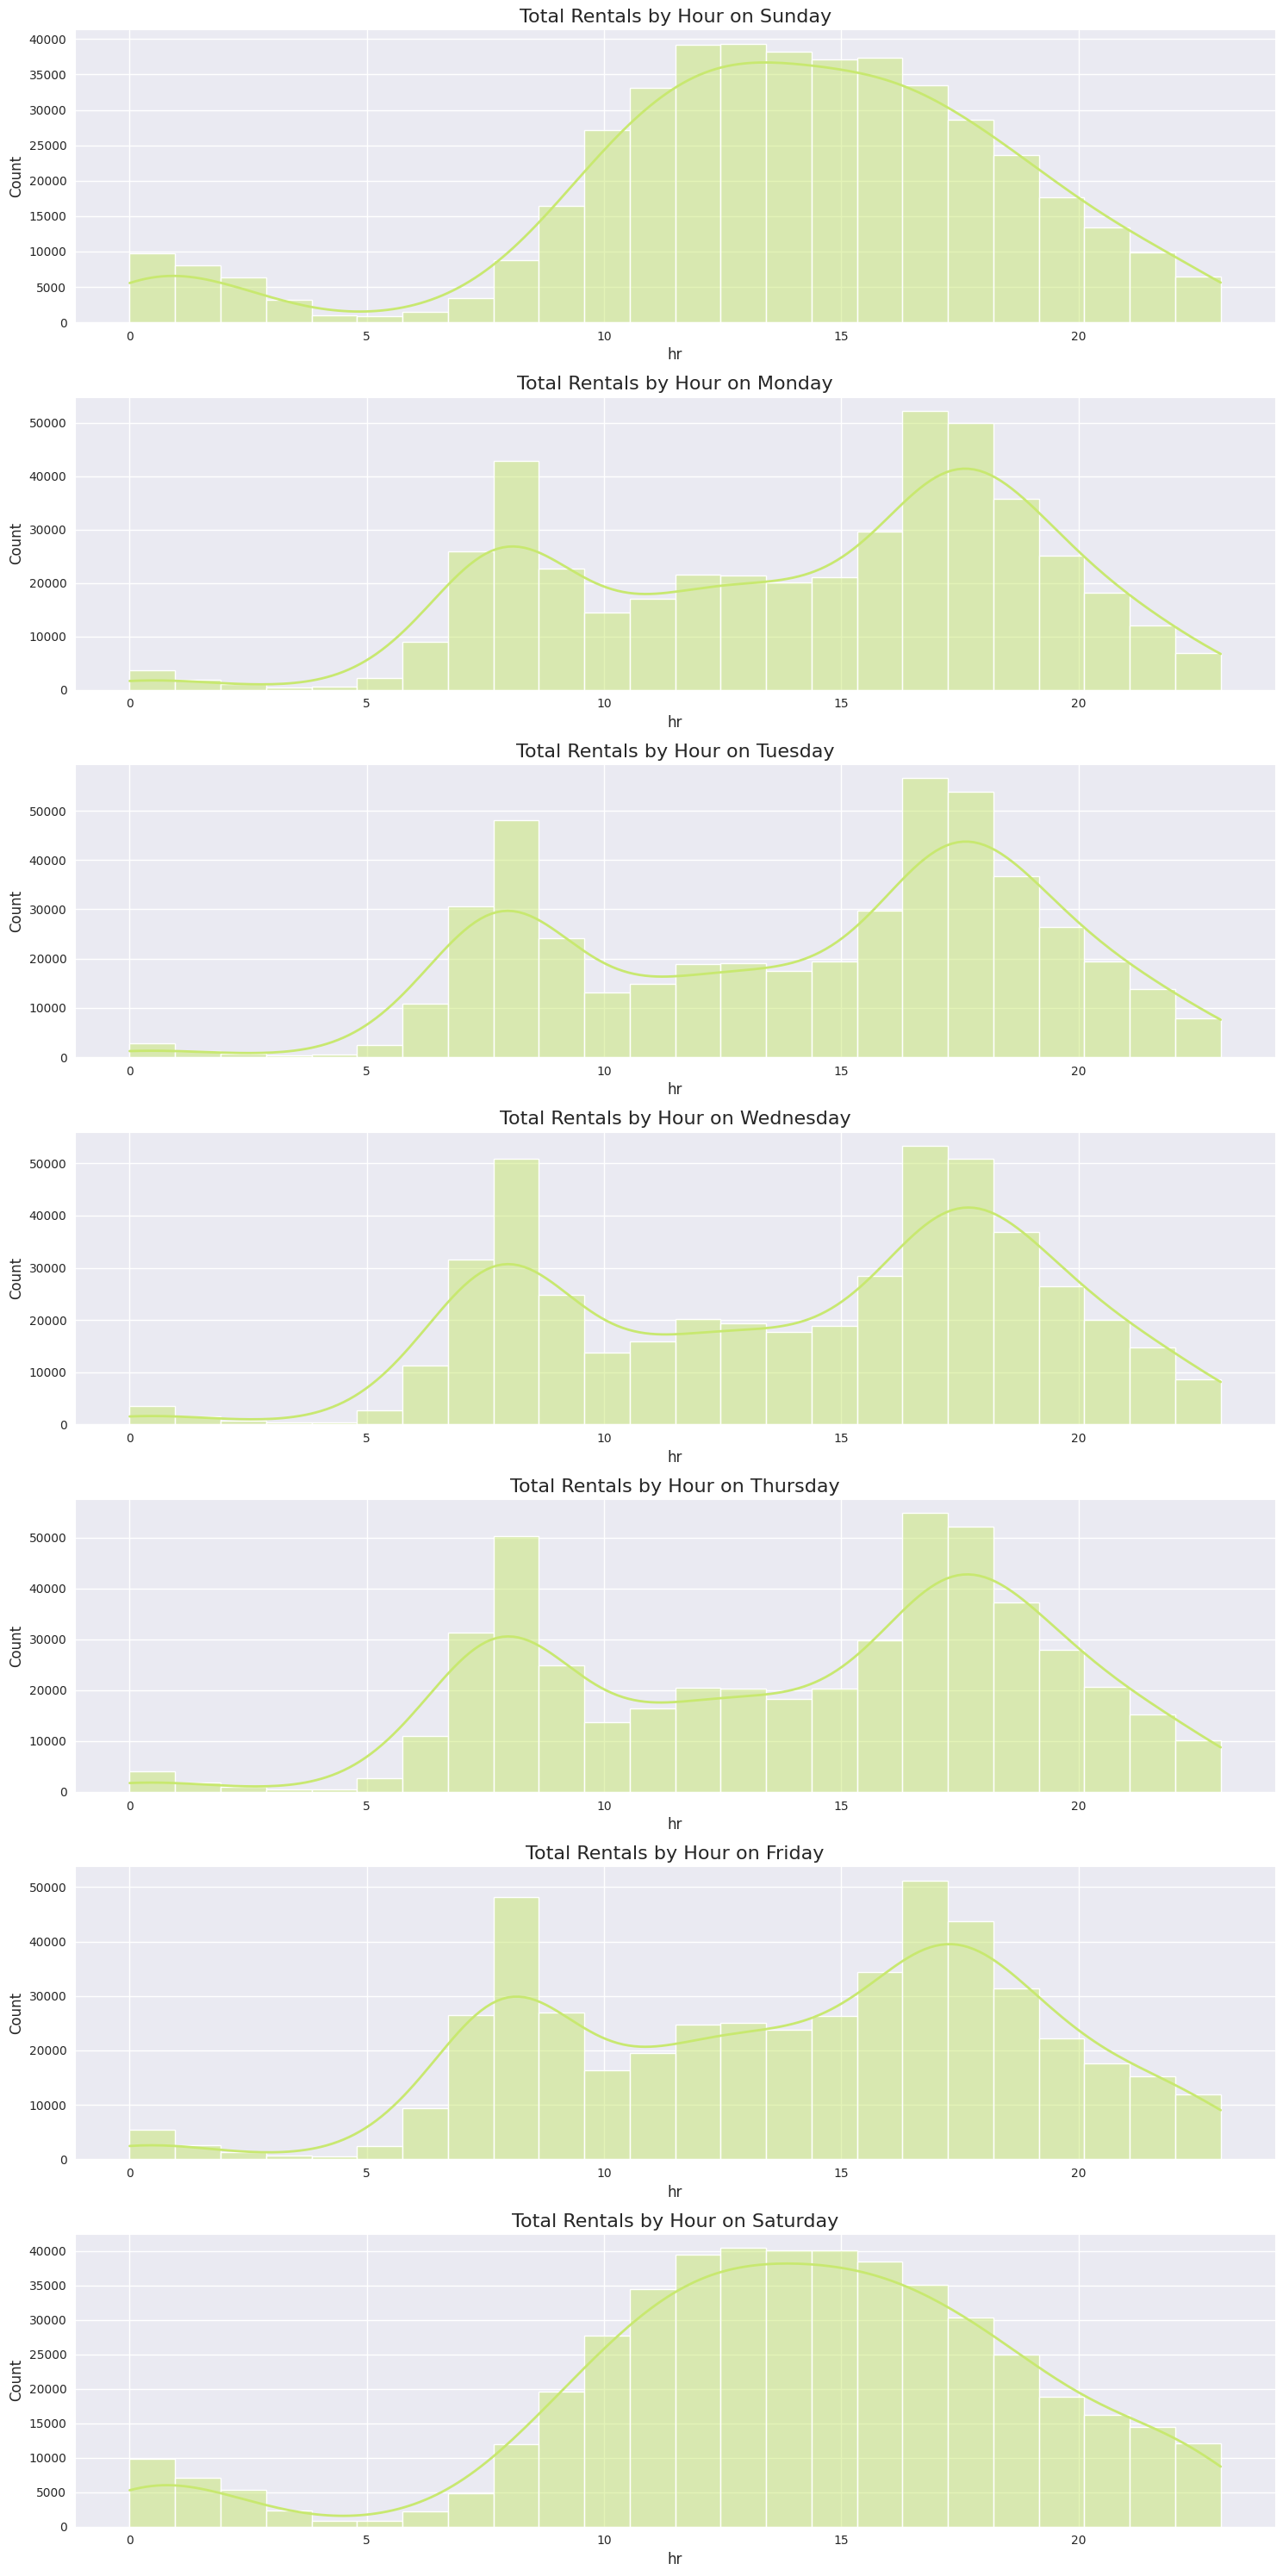

In [201]:
# Plotting the distribution of the count of bikes rented per hour for each day of the week
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

for i in range(7):
    df_weekday = df_hour[df_hour['weekday'] == i].copy()
    df_weekday['weekday'] = df_weekday['weekday'].map(weekday_map)

    # Plot each day’s data on a separate subplot
    sns.histplot(x='hr', weights='cnt', data=df_weekday, ax=ax[i], color=palette_1, bins=24, kde=True)
    ax[i].set_title(f'Total Rentals by Hour on {weekday_map[i]}')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1081/1355515831.py:3: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  sns.barplot(x='mnth', y='cnt', data=df_day, palette=palette, hue='mnth', legend=False)


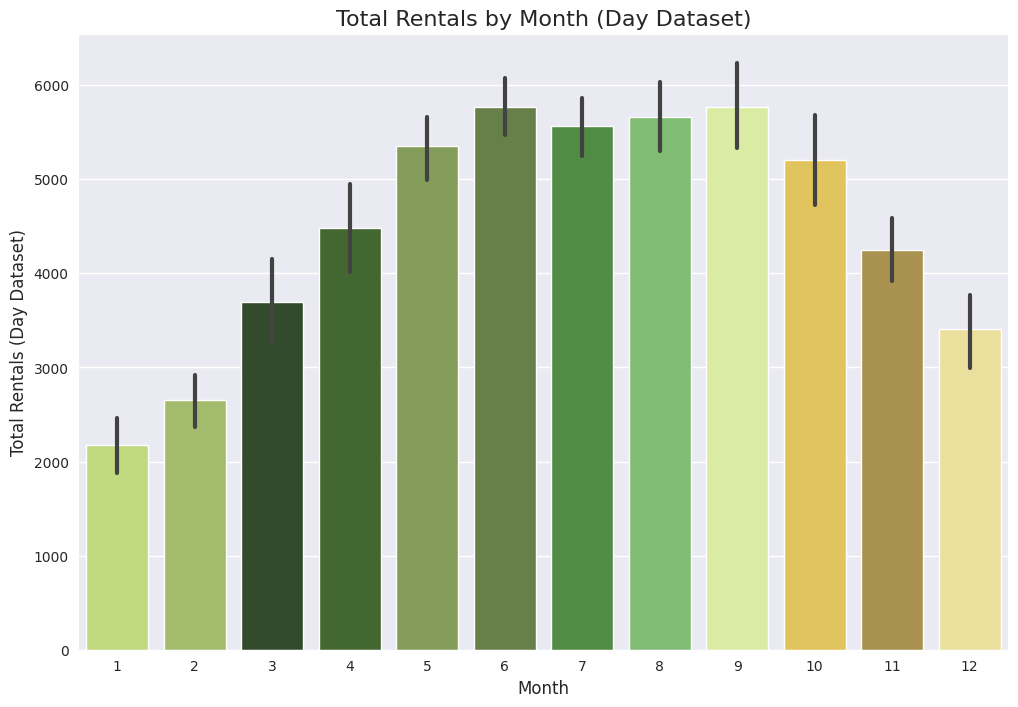

In [202]:
# Monthly distribution of bike rentals
plt.figure(figsize=(12, 8))
sns.barplot(x='mnth', y='cnt', data=df_day, palette=palette, hue='mnth', legend=False)
plt.title('Total Rentals by Month (Day Dataset)')
plt.xlabel('Month')
plt.ylabel('Total Rentals (Day Dataset)')
plt.show()


/tmp/ipykernel_1081/2085984098.py:3: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  sns.barplot(x='mnth', y='cnt', data=df_hour, palette=palette, hue='mnth', legend=False)


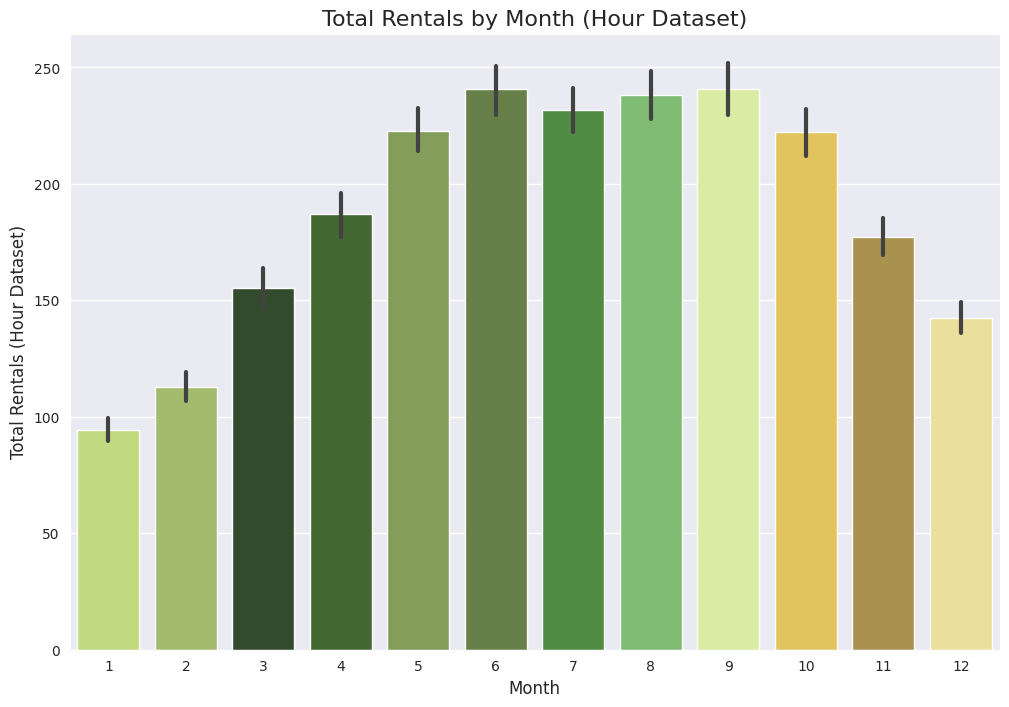

In [203]:
# Monthly distribution of bike rentals
plt.figure(figsize=(12, 8))
sns.barplot(x='mnth', y='cnt', data=df_hour, palette=palette, hue='mnth', legend=False)
plt.title('Total Rentals by Month (Hour Dataset)')
plt.xlabel('Month')
plt.ylabel('Total Rentals (Hour Dataset)')
plt.show()

From these distributions, rentals tend to be affected by seasons, with spring, summer, and fall generally showing higher rental counts compared to winter, likely due to more favorable weather conditions. The monthly rental data confirms this trend, with the highest total rentals occurring in the warmer months from April to October, as shown in both the day and hour datasets. Weather conditions also play a role, as clear weather promotes higher bike usage, while adverse conditions like heavy rain or light snow tend to lower rental counts. Additionally, more rentals occur on working days, indicating that many employees use rented bikes for commuting. This is further emphasized by peak rental periods on working days, specifically around 8 AM to 9 AM and 5 PM to 7 PM, aligning with standard commuting hours. Moreover, the data suggests that warmer temperatures and higher "feels-like" temperatures encourage more rentals, likely because people feel more comfortable in milder weather, whereas colder temperatures discourage bike usage.

### **Addressing Business Question #2**
- How do casual and  registered users differ in their rental patterns?

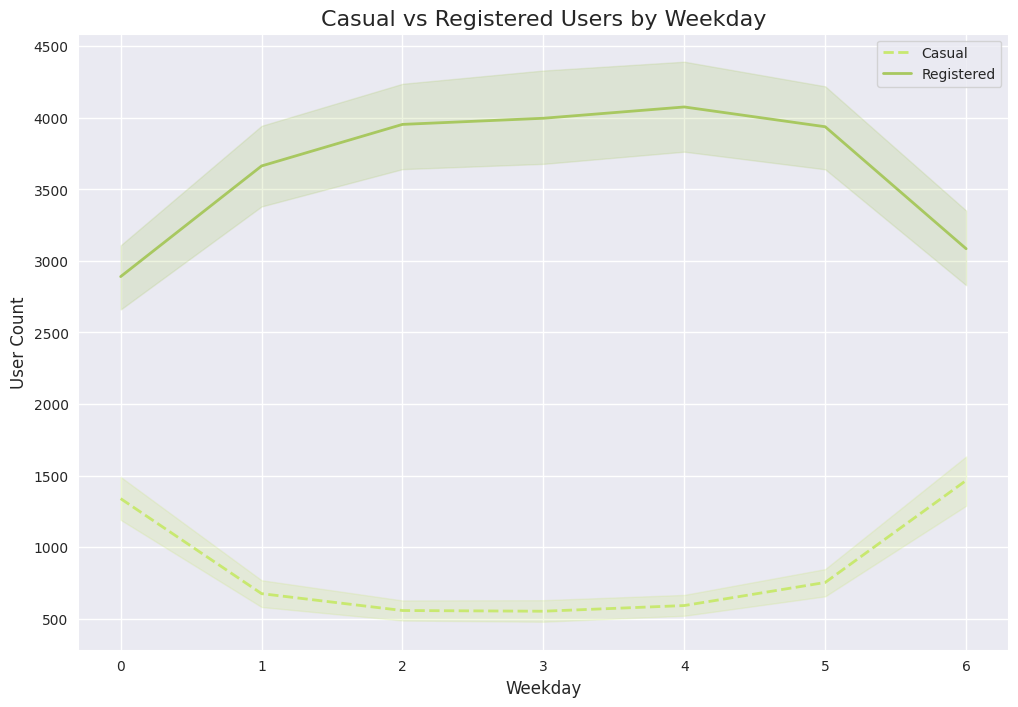

In [204]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_day, x='weekday', y='casual', label='Casual', linestyle='--', color=palette[0])
sns.lineplot(data=df_day, x='weekday', y='registered', label='Registered', linestyle='-', color=palette[1])
plt.title('Casual vs Registered Users by Weekday')
plt.xlabel('Weekday')
plt.ylabel('User Count')
plt.legend()
plt.show()

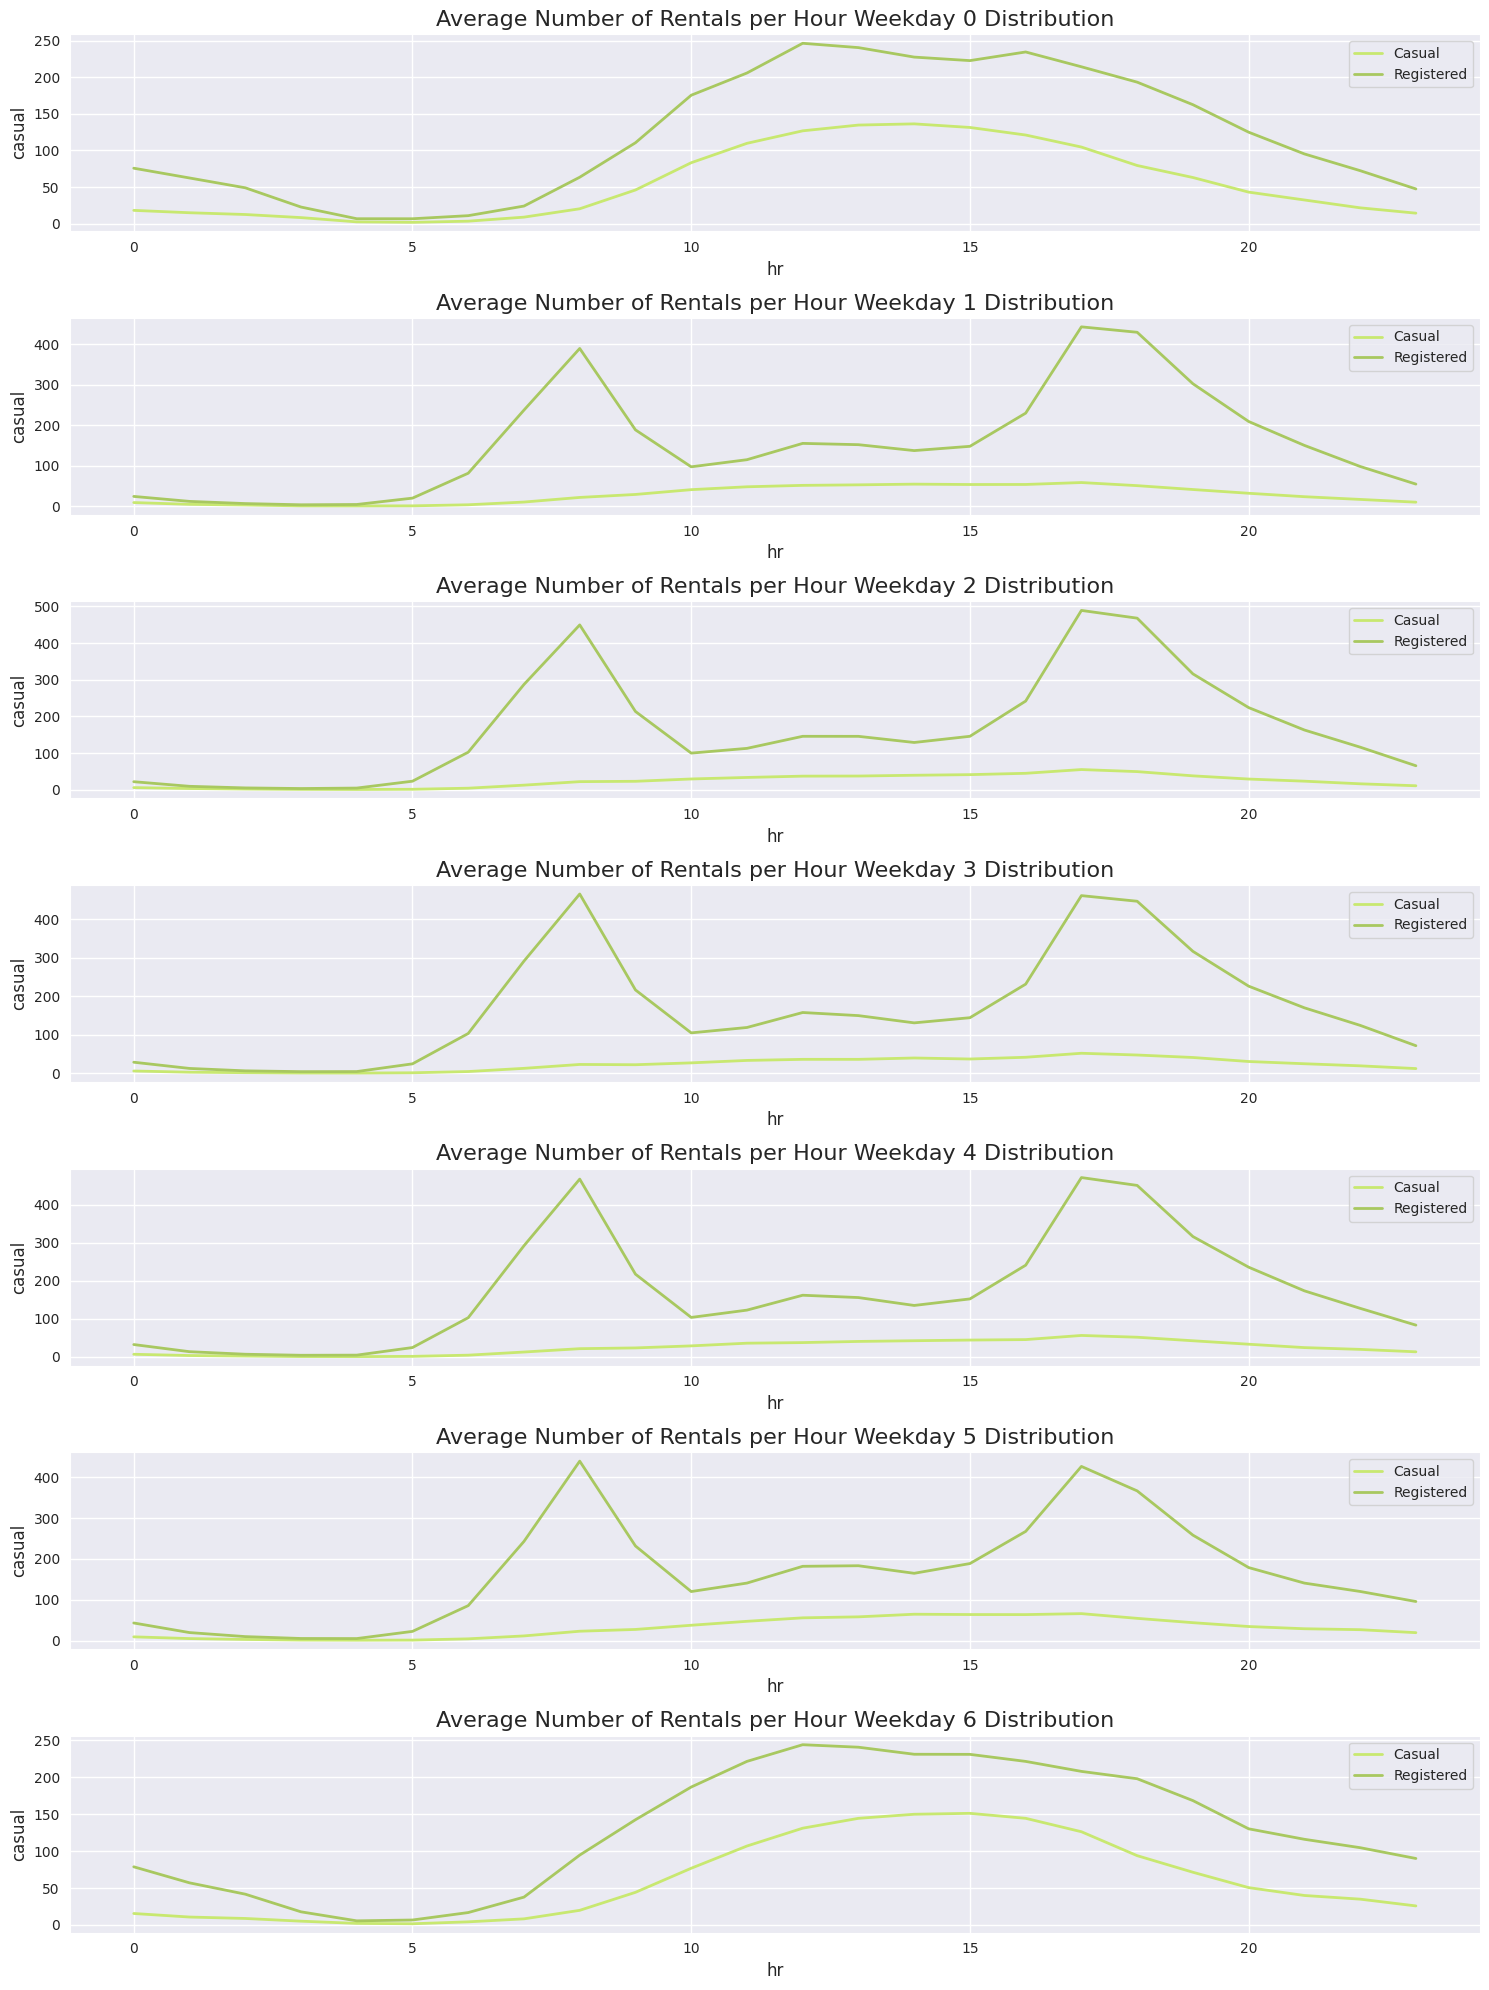

In [205]:
# Plotting the distribution of the count of bikes rented per hour for each day of the week
fig, ax = plt.subplots(7, 1, figsize=(15, 20))

for i in range(7):
    df_weekday = df_hour[df_hour['weekday'] == i]
    sns.lineplot(data=df_weekday.groupby('hr')['casual'].mean(), label='Casual', color=palette[0], ax=ax[i], markers=True)
    sns.lineplot(data=df_weekday.groupby('hr')['registered'].mean(), label='Registered', color=palette[1], ax=ax[i], markers=True)
    ax[i].set_title(f'Average Number of Rentals per Hour Weekday {i} Distribution')
    
plt.tight_layout()
plt.show()

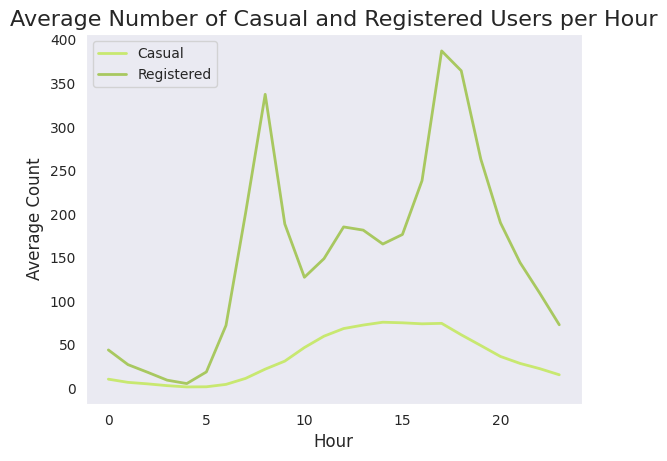

In [206]:
sns.lineplot(data=df_hour.groupby('hr')['casual'].mean(), label='Casual', color=palette[0])
sns.lineplot(data=df_hour.groupby('hr')['registered'].mean(), label='Registered', color=palette[1])
plt.title('Average Number of Casual and Registered Users per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.legend()
plt.grid()
plt.show()

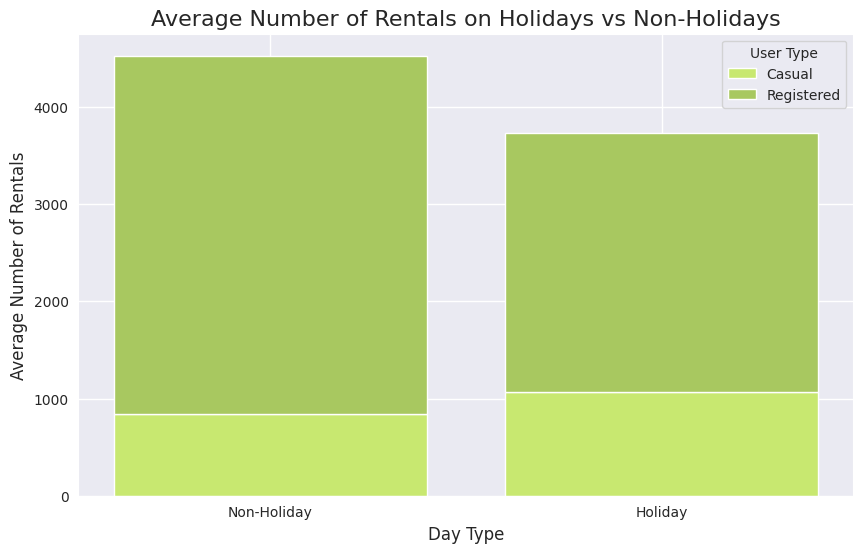

In [207]:
numeric_cols = ['casual', 'registered']

# Calculate the average rentals for holidays and non-holidays
holiday_avg = df_day.groupby('holiday')[numeric_cols].mean().reset_index()
holiday_avg['holiday'] = holiday_avg['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Plotting a stacked bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot casual and registered rentals as stacked bars
ax.bar(holiday_avg['holiday'], holiday_avg['casual'], label='Casual', color=palette_2_compare[0])
ax.bar(holiday_avg['holiday'], holiday_avg['registered'], bottom=holiday_avg['casual'], label='Registered', color=palette_2_compare[1])

# Add labels and title
ax.set_title('Average Number of Rentals on Holidays vs Non-Holidays')
ax.set_ylabel('Average Number of Rentals')
ax.set_xlabel('Day Type')
ax.legend(title='User Type')
plt.grid(True, axis='y')

plt.show()


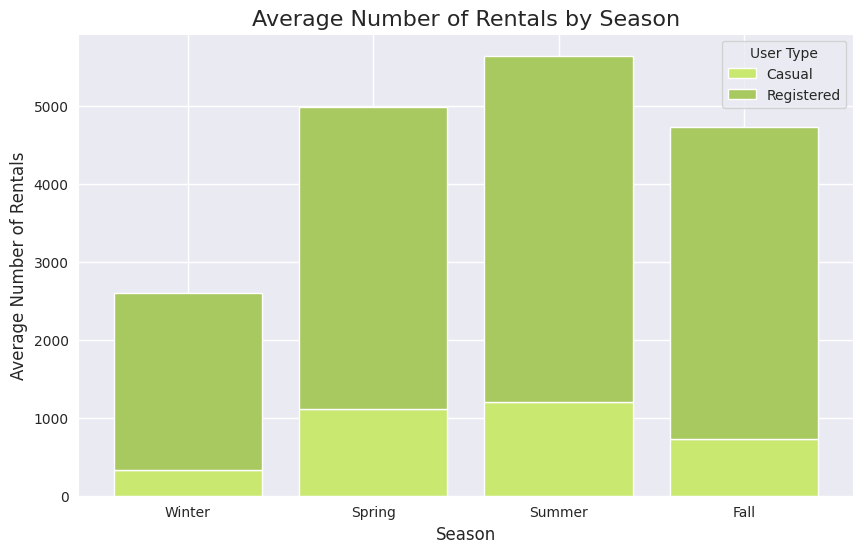

In [208]:
# Calculate the average rentals for each season
season_avg = df_day.groupby('season')[numeric_cols].mean().reset_index()
season_avg['season'] = season_avg['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Plotting a stacked bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot casual and registered rentals as stacked bars
ax.bar(season_avg['season'], season_avg['casual'], label='Casual', color=palette_2_compare[0])
ax.bar(season_avg['season'], season_avg['registered'], bottom=season_avg['casual'], label='Registered', color=palette_2_compare[1])

# Add labels and title
ax.set_title('Average Number of Rentals by Season')
ax.set_ylabel('Average Number of Rentals')
ax.set_xlabel('Season')
ax.legend(title='User Type')
plt.grid(True, axis='y')

plt.show()

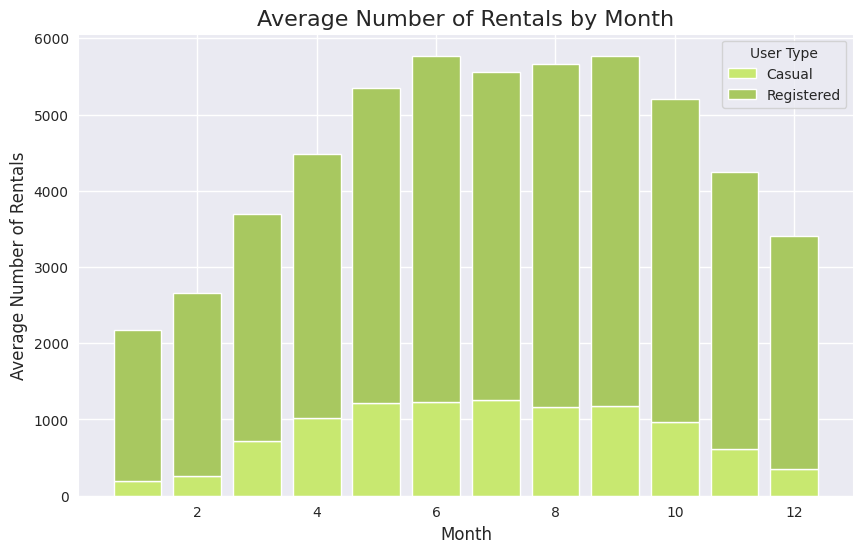

In [209]:
# Calculate the average rentals for each month
month_avg = df_day.groupby('mnth')[numeric_cols].mean().reset_index()

# Plotting a stacked bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot casual and registered rentals as stacked bars
ax.bar(month_avg['mnth'], month_avg['casual'], label='Casual', color=palette_2_compare[0])
ax.bar(month_avg['mnth'], month_avg['registered'], bottom=month_avg['casual'], label='Registered', color=palette_2_compare[1])

# Add labels and title
ax.set_title('Average Number of Rentals by Month')
ax.set_ylabel('Average Number of Rentals')
ax.set_xlabel('Month')
ax.legend(title='User Type')
plt.grid(True, axis='y')

plt.show()

The rental patterns of casual and registered users reveal distinct usage behaviors. Registered users demonstrate consistent bike rentals throughout the week, with noticeable peaks on weekdays, likely due to commuting needs. Their usage tends to surge during typical commuting hours, around 8-9 AM and 5-6 PM, aligning with a regular work schedule. In contrast, casual users show higher rental numbers on weekends and holidays, suggesting a preference for leisure or recreational use. Seasonality also plays a significant role, with both user groups increasing rentals in summer and reducing them in winter. Casual users, in particular, exhibit a sharp drop in colder months, highlighting their tendency for fair-weather riding. Month-wise, rentals peak during warmer months, especially mid-year, indicating a seasonal boost for both groups, though registered users maintain a steadier pattern across seasons. These differences underscore how registered users are likely commuting regularly, while casual users are more influenced by recreational, holiday, and seasonal factors.

In [210]:
merged_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weathersit_day', 'temp_day',
       'atemp_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day',
       'cnt_day'],
      dtype='object')

In [211]:
# Change the columns and values of the merged dataset to be more descriptive

# Define the mapping for the columns
column_map = {
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Hourly Weather Situation',
    'temp': 'Hourly Temperature',
    'atemp': 'Hourly Feels-like Temperature',
    'hum': 'Hourly Humidity',
    'windspeed': 'Hourly Windspeed',
    'casual': 'Hourly Casual Users',
    'registered': 'Hourly Registered Users',
    'cnt': 'Hourly Total Rentals',
    'weathersit_day': 'Daily Weather Situation',
    'temp_day': 'Daily Temperature',
    'atemp_day': 'Daily Feels-like Temperature',
    'hum_day': 'Daily Humidity',
    'windspeed_day': 'Daily Windspeed',
    'casual_day': 'Daily Casual Users',
    'registered_day': 'Daily Registered Users',
    'cnt_day': 'Daily Total Rentals'
}

# Rename the columns of the merged dataset
merged_df = merged_df.rename(columns=column_map)

# Define the mapping for the values
merged_df['Season'] = merged_df['Season'].map(season_map)
merged_df['Year'] = merged_df['Year'].map({0: 2011, 1: 2012})
merged_df['Holiday'] = merged_df['Holiday'].map(holiday_map)
merged_df['Weekday'] = merged_df['Weekday'].map(weekday_map)
merged_df['Working Day'] = merged_df['Working Day'].map(workday_map)
merged_df['Hourly Weather Situation'] = merged_df['Hourly Weather Situation'].map(weather_map)
merged_df['Daily Weather Situation'] = merged_df['Daily Weather Situation'].map(weather_map)

merged_df.head()


,Date,Season,Year,Month,hr,Holiday,Weekday,Working Day,Hourly Weather Situation,Hourly Temperature,...,Hourly Registered Users,Hourly Total Rentals,Daily Weather Situation,Daily Temperature,Daily Feels-like Temperature,Daily Humidity,Daily Windspeed,Daily Casual Users,Daily Registered Users,Daily Total Rentals
0,2011-01-01,Winter,2011,1,0,Non-Holiday,Saturday,Non-Workingday,Clear,0.24,...,13,16,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,Winter,2011,1,1,Non-Holiday,Saturday,Non-Workingday,Clear,0.22,...,32,40,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,Winter,2011,1,2,Non-Holiday,Saturday,Non-Workingday,Clear,0.22,...,27,32,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,Winter,2011,1,3,Non-Holiday,Saturday,Non-Workingday,Clear,0.24,...,10,13,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,Winter,2011,1,4,Non-Holiday,Saturday,Non-Workingday,Clear,0.24,...,1,1,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985


In [212]:
# save the cleaned dataset
merged_df.to_csv('bike-sharing-dataset-cleaned.csv', index=True)